<a href="https://colab.research.google.com/github/Riccyvt/Actividades/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
#se cargan las librerias
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import io #maneja entradas y salidas
from google.colab import files

In [59]:
uploaded = files.upload()

Saving economiaTIC.csv to economiaTIC.csv
Saving hogaresTIC.csv to hogaresTIC.csv


In [133]:
#crear Data frame

df_entidad_tipo= pd.read_csv(io.BytesIO(uploaded['hogaresTIC.csv']), sep=",",decimal=" ")
df_sector_actividad=pd.read_csv(io.BytesIO(uploaded['economiaTIC.csv']), sep=",",decimal=" ")

In [134]:
df_entidad_tipo.shape

(32, 7)

In [135]:
df_sector_actividad.shape

(32, 11)

In [136]:
# Resumen estadístico de los datos
df_entidad_tipo.describe()

,Computadora,Internet,Televisor,Televisión de paga,Telefonía,Radio
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01
mean,5.156952e+05,8.047168e+05,1.065130e+06,4.871406e+05,1.118496e+06,5.579714e+05
std,5.003787e+05,7.587543e+05,9.266670e+05,3.754059e+05,9.440354e+05,5.295236e+05
min,1.104460e+05,1.729120e+05,2.242500e+05,1.159960e+05,2.398770e+05,6.914100e+04
25%,2.348608e+05,3.776528e+05,4.903400e+05,2.233125e+05,5.363250e+05,2.368485e+05
50%,3.487305e+05,5.569260e+05,8.174820e+05,3.880740e+05,8.877190e+05,4.262175e+05
75%,5.878710e+05,8.799038e+05,1.164478e+06,5.718785e+05,1.262142e+06,6.370525e+05
max,2.305427e+06,3.773573e+06,4.696551e+06,1.729948e+06,4.777328e+06,2.601743e+06


In [137]:
# Resumen estadístico de los datos
df_sector_actividad.describe()

,ActivosComp,InactivosComp,ActivosInternt,InactivosInternt,ActivosTel,InactivosTel,Primario,Secundario,Terciario,NoEspecificado
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,32.000000
mean,8.114120e+05,3.375519e+05,1.646723e+06,7.849380e+05,1.764834e+06,8.650223e+05,209767.750000,4.597760e+05,1.167469e+06,11971.218750
std,8.012650e+05,3.781125e+05,1.469841e+06,7.692230e+05,1.543081e+06,8.086351e+05,212048.006467,3.728324e+05,1.134742e+06,18117.637792
min,1.748590e+05,6.370300e+04,3.656380e+05,1.363540e+05,3.849240e+05,1.528910e+05,23224.000000,6.223400e+04,2.603290e+05,717.000000
25%,3.663185e+05,1.479802e+05,7.875698e+05,3.592955e+05,8.794085e+05,3.854308e+05,61041.500000,2.173090e+05,5.580385e+05,2044.000000
50%,5.861785e+05,2.194005e+05,1.260706e+06,5.440760e+05,1.397470e+06,6.324460e+05,119761.000000,3.871660e+05,8.554385e+05,5167.500000
75%,9.349735e+05,3.303075e+05,1.742668e+06,7.802920e+05,1.983643e+06,9.069968e+05,292311.000000,5.949375e+05,1.146050e+06,9643.750000
max,3.821546e+06,1.920159e+06,7.576460e+06,4.017504e+06,8.014408e+06,4.224241e+06,768837.000000,1.901435e+06,5.775452e+06,85699.000000


In [138]:
df_entidad_tipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Entidad Federativa  32 non-null     object
 1   Computadora         32 non-null     int64 
 2   Internet            32 non-null     int64 
 3   Televisor           32 non-null     int64 
 4   Televisión de paga  32 non-null     int64 
 5   Telefonía           32 non-null     int64 
 6   Radio               32 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.9+ KB


In [139]:
df_sector_actividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Entidad Federativa  32 non-null     object
 1   ActivosComp         32 non-null     int64 
 2   InactivosComp       32 non-null     int64 
 3   ActivosInternt      32 non-null     int64 
 4   InactivosInternt    32 non-null     int64 
 5   ActivosTel          32 non-null     int64 
 6   InactivosTel        32 non-null     int64 
 7   Primario            32 non-null     int64 
 8   Secundario          32 non-null     int64 
 9   Terciario           32 non-null     int64 
 10  NoEspecificado      32 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.9+ KB


In [140]:
#cambiar tipo de dato object
df_entidad_tipo['Entidad Federativa']= df_entidad_tipo['Entidad Federativa'].astype(str)
df_sector_actividad['Entidad Federativa']= df_sector_actividad['Entidad Federativa'].astype(str)

In [68]:
#eliminación de valores atípicos
df_entidad_tipo.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Computadora,Internet,Televisor,Televisión de paga,Telefonía,Radio
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,515695.218750,804716.812500,1065129.906250,487140.562500,1118495.500000,557971.375000
std,500378.735232,758754.257517,926666.993202,375405.919109,944035.410017,529523.596146
min,110446.000000,172912.000000,224250.000000,115996.000000,239877.000000,69141.000000
25%,234860.750000,377652.750000,490340.000000,223312.500000,536325.000000,236848.500000
50%,348730.500000,556926.000000,817482.000000,388074.000000,887719.000000,426217.500000
75%,587871.000000,879903.750000,1164478.000000,571878.500000,1262142.000000,637052.500000
max,2305427.000000,3773573.000000,4696551.000000,1729948.000000,4777328.000000,2601743.000000


In [141]:
#eliminación de valores atípicos
df_sector_actividad.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,ActivosComp,InactivosComp,ActivosInternt,InactivosInternt,ActivosTel,InactivosTel,Primario,Secundario,Terciario,NoEspecificado
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,811412.031250,337551.906250,1646723.218750,784938.031250,1764834.062500,865022.281250,209767.750000,459775.968750,1167468.562500,11971.218750
std,801265.038512,378112.468802,1469841.124827,769223.049136,1543081.035467,808635.092661,212048.006467,372832.387523,1134742.472719,18117.637792
min,174859.000000,63703.000000,365638.000000,136354.000000,384924.000000,152891.000000,23224.000000,62234.000000,260329.000000,717.000000
25%,366318.500000,147980.250000,787569.750000,359295.500000,879408.500000,385430.750000,61041.500000,217309.000000,558038.500000,2044.000000
50%,586178.500000,219400.500000,1260705.500000,544076.000000,1397470.000000,632446.000000,119761.000000,387166.000000,855438.500000,5167.500000
75%,934973.500000,330307.500000,1742667.500000,780292.000000,1983643.000000,906996.750000,292311.000000,594937.500000,1146050.250000,9643.750000
max,3821546.000000,1920159.000000,7576460.000000,4017504.000000,8014408.000000,4224241.000000,768837.000000,1901435.000000,5775452.000000,85699.000000


In [142]:
#Revisión de datos faltantes y nulos
df_entidad_tipo.isna().fillna(0).sum()

Entidad Federativa    0
Computadora           0
Internet              0
Televisor             0
Televisión de paga    0
Telefonía             0
Radio                 0
dtype: int64

In [143]:
#Revisión de datos faltantes y nulos
df_sector_actividad.isna().fillna(0).sum()

Entidad Federativa    0
ActivosComp           0
InactivosComp         0
ActivosInternt        0
InactivosInternt      0
ActivosTel            0
InactivosTel          0
Primario              0
Secundario            0
Terciario             0
NoEspecificado        0
dtype: int64

In [72]:
df_entidad_tipo['Entidad Federativa'].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype=object)

In [144]:
df_entidad_tipo.columns

Index(['Entidad Federativa', 'Computadora', 'Internet', 'Televisor',
       'Televisión de paga', 'Telefonía', 'Radio'],
      dtype='object')

In [145]:
# Calcula valores en cada columna

# Seleccionar las columnas a sumar
columnas_a_sumar = ['Computadora', 'Internet', 'Televisor', 'Televisión de paga', 'Telefonía', 'Radio']

# Calcular la suma de las columnas seleccionadas por separado y crear una nueva Serie
suma_por_columna = df_entidad_tipo[columnas_a_sumar].sum(axis=0)

print('Suma por columna:')
print(suma_por_columna)

Suma por columna:
Computadora           16502247
Internet              25750938
Televisor             34084157
Televisión de paga    15588498
Telefonía             35791856
Radio                 17855084
dtype: int64


<ipython-input-146-b4d3aa2c2800>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Mapa de Calor de Correlación')

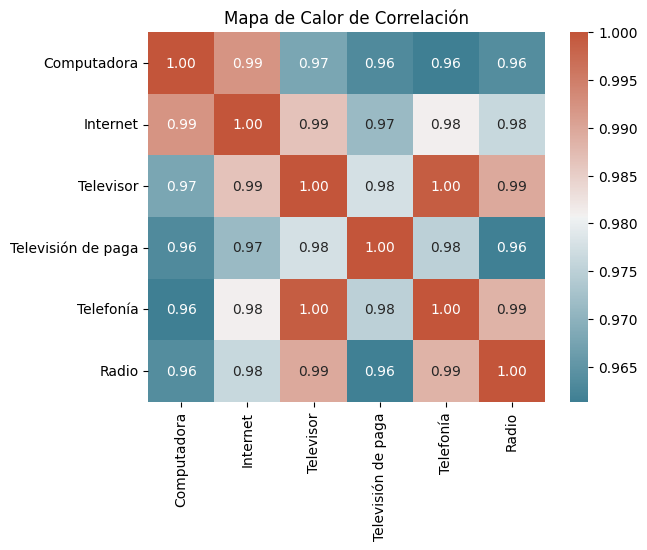

In [146]:
# Analizar las relaciones entre variables.
# Calcular la matriz de correlación
corr = df_entidad_tipo.corr()
# trazar el mapa de calor
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True),fmt=".2f")
plt.title('Mapa de Calor de Correlación')

In [147]:
import plotly.express as px
fig = px.pie(values = [16502247, 25750938, 34084157,15588498,35791856,17855084],
             names = ['Computadora', 'Internet', 'Televisor', 'Televisión de paga', 'Telefoníaa', 'Radio'],
             color = ['Computadora', 'Internet', 'Televisor', 'Televisión de paga', 'Telefoníaa', 'Radio'],
             hole = 0.2)

fig.show()

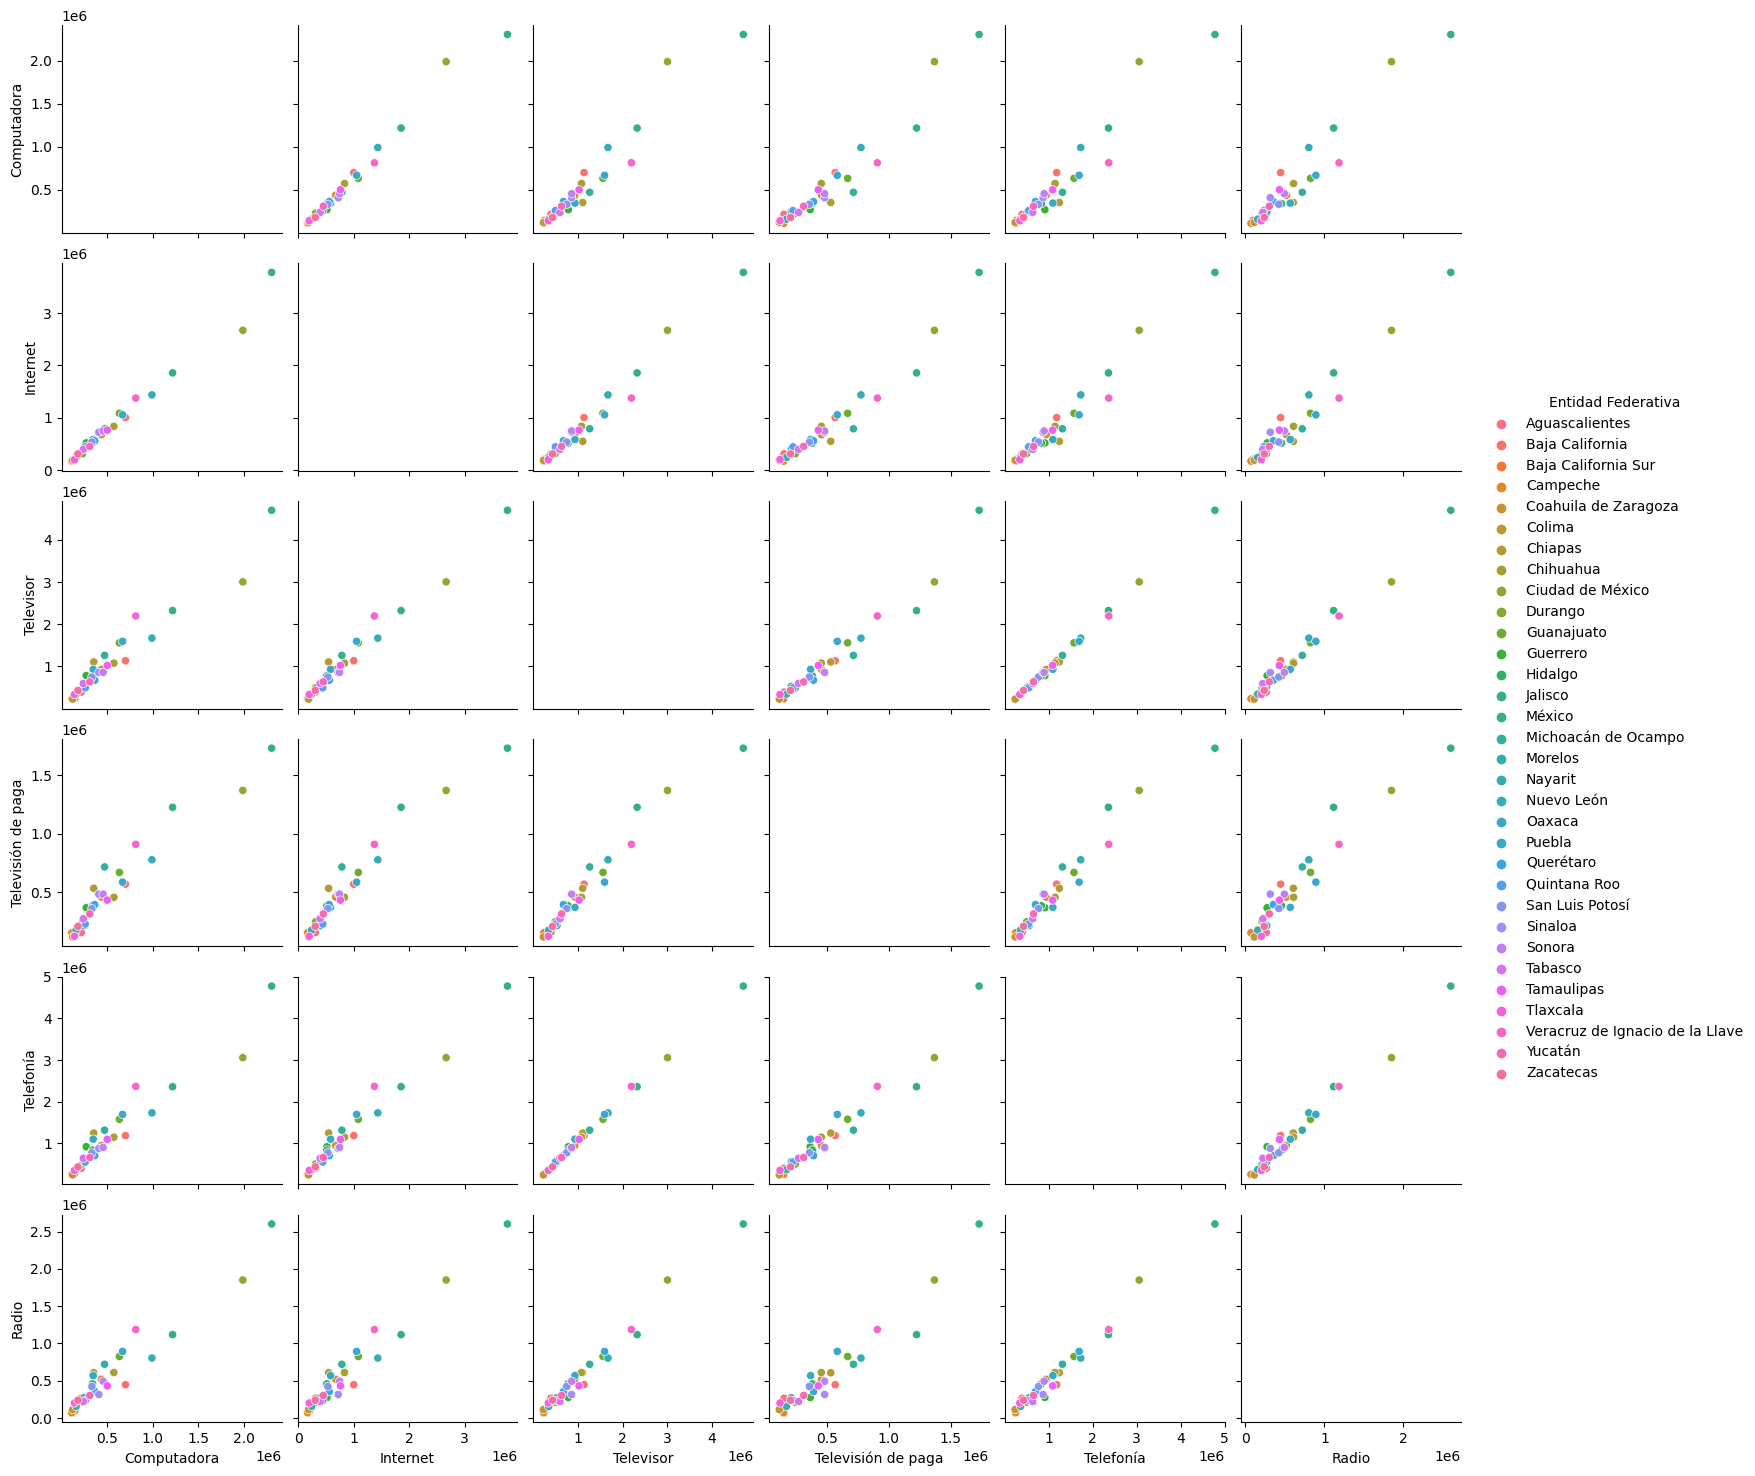

In [148]:
import seaborn as sns
#Grafico de dispersión de pares
#identifica patrones y tendencias en los datos
sns.pairplot(df_entidad_tipo, hue='Entidad Federativa')

In [149]:
#¿Cuál es el estado que tiene menor uso de Internet por Estado?
# 1. Selecciona las columnas 'Internet' y 'state' del DataFrame.
#    Esto crea un nuevo DataFrame que contiene solo estas dos columnas.
statewise_tic = df_entidad_tipo[['Internet', 'Entidad Federativa']]

# 2. Agrupa los datos por la columna 'Entidad Federativa' y calcula la mediana para la columna 'Internet' en cada grupo.
#    El resultado es un DataFrame con una fila para cada estado y la mediana correspondiente de Internet en ese estado.
statewise_tic = statewise_tic.groupby('Entidad Federativa', as_index=False).median()

# 3. Ordena el DataFrame resultante en función de los valores de uso de Internet en orden ascendente.
#    Esto significa que los estados con las medianas de uso de Internet más bajas estarán en la parte superior.
statewise_tic = statewise_tic.sort_values(by='Internet')

# 4. Muestra las primeras 5 filas del DataFrame resultante.
#    Esto mostrará los 10 estados con las medianas de uso de TIC más bajas.
statewise_tic.head()

,Entidad Federativa,Internet
3,Campeche,172912.0
8,Colima,190055.0
28,Tlaxcala,202178.0
2,Baja California Sur,209039.0
17,Nayarit,244750.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



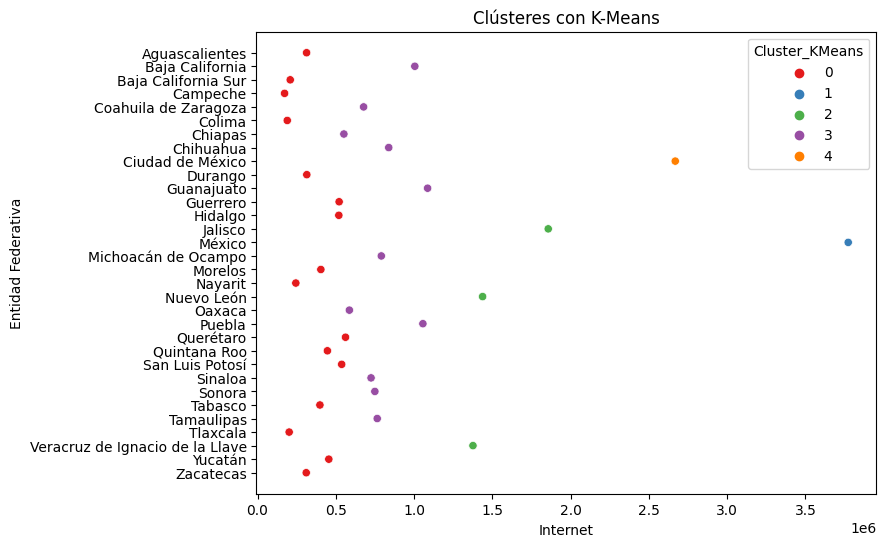

In [150]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#Crear el modelo K-Means con 5 clústeres
# Elegir el número de clústeres
n_clusters_kmeans = 5

# Excluir las columnas no numéricas
df_numeric = df_entidad_tipo[['Computadora', 'Internet', 'Telefonía']]

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Crear el modelo K-Means con 5 clústeres
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=0)
df_entidad_tipo['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

# Gráfico para el método K-Means
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Internet', y='Entidad Federativa', hue='Cluster_KMeans', data=df_entidad_tipo, palette='Set1')
plt.title('Clústeres con K-Means')
plt.xlabel('Internet')
plt.ylabel('Entidad Federativa')
plt.show()

In [151]:
df_sector_actividad.columns

Index(['Entidad Federativa', 'ActivosComp', 'InactivosComp', 'ActivosInternt',
       'InactivosInternt', 'ActivosTel', 'InactivosTel', 'Primario',
       'Secundario', 'Terciario', 'NoEspecificado'],
      dtype='object')

In [152]:
# Calcula valores en cada columna

# Seleccionar las columnas a sumar
columnas_para_sumar = ['ActivosComp', 'ActivosInternt', 'ActivosTel','InactivosComp', 'InactivosInternt', 'InactivosTel']

# Calcular la suma de las columnas seleccionadas por separado y crear una nueva Serie
suma_de_columna = df_sector_actividad[columnas_para_sumar].sum(axis=0)

print('Suma de columna:')
print(suma_de_columna)

Suma de columna:
ActivosComp         25965185
ActivosInternt      52695143
ActivosTel          56474690
InactivosComp       10801661
InactivosInternt    25118017
InactivosTel        27680713
dtype: int64


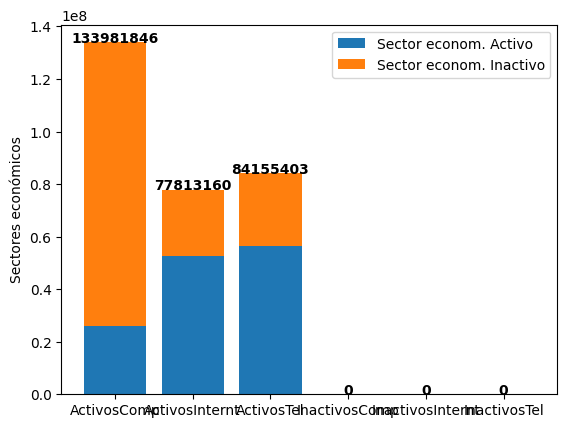

In [154]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
df_sector_actividad = ['ActivosComp', 'ActivosInternt', 'ActivosTel','InactivosComp', 'InactivosInternt', 'InactivosTel']
valores1 = [25965185, 52695143, 56474690,0,0,0]
valores2 = [108016661, 25118017, 27680713,0,0,0]

fig, ax = plt.subplots()

# Gráfico de barras apiladas
ax.bar(df_sector_actividad, valores1, label = "Sector econom. Activo")
ax.bar(df_sector_actividad, valores2, bottom = valores1, label = "Sector econom. Inactivo")

# Suma de valores
total_values = np.add(valores1, valores2)

# Etiquetas con el total
for i, total in enumerate(total_values):
  ax.text(i, total + 0.5, round(total),
          ha = 'center', weight = 'bold', color = 'black')

ax.legend(loc = 'upper right')
ax.set_ylabel('Sectores económicos')

plt.show()


<ipython-input-153-bdbc3b8136a8>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



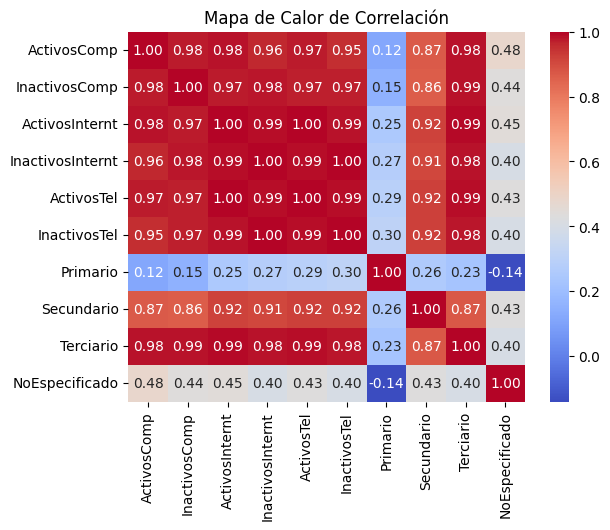

In [153]:
# Analizar las relaciones entre variables.
# Calcular la matriz de correlación
correlation = df_sector_actividad.corr()
#Traza el mapa de calor
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()